In [2]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq, readseq, match_hist
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from corrLib import density_fluctuation
from scipy import signal
from scipy.interpolate import griddata
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
import matplotlib
from matplotlib import rc
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = 10, 6
matplotlib.rcParams['font.family'] = 'serif'

In [3]:
folder = r'D:\Data\03032020'
sfL = next(os.walk(folder))[1]
nameL = []
intensityL = []
for name in sfL:
    if name.find('_') < 0:
        continue
    img = io.imread(os.path.join(folder, name, '16-bit', '0000.tif'))
    nameL.append(name)
    intensityL.append(img.mean())
data = pd.DataFrame().assign(name=nameL, intensity=intensityL)

In [4]:
# construct dictionary data
dict_data = {}
for num, i in data.iterrows():
    f, l = i['name'].split('_')
    if f in dict_data.keys():
        dict_data[f].append(i.intensity)
    else:
        dict_data[f] = []
        dict_data[f].append(i.intensity)

In [5]:
# construct dataframe
df = pd.DataFrame(data=dict_data)
cols = df.columns.tolist()
cols = cols[1:] + cols[:1]
df = df[cols]
mean = df.mean()
std = df.std()

c = []
for s in cols:
    c.append(int(s))

Text(0.5, 0, 'average intensity')

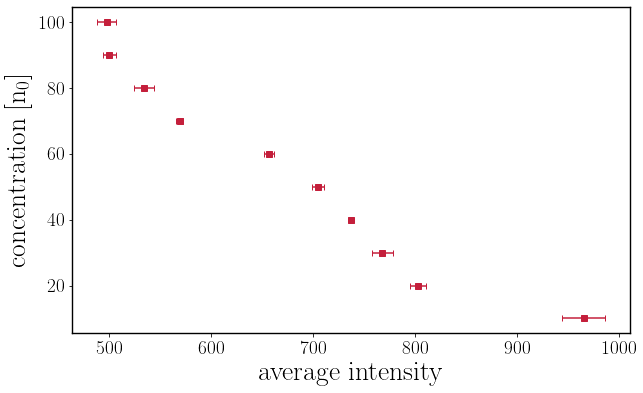

In [6]:
plt.errorbar(mean, c, xerr=std, ls='', c=wowcolor(0), marker='s',  capsize=3)
plt.ylabel('concentration [n$_0$]')
plt.xlabel('average intensity')

In [7]:
def log_fit(x, I0, k):
    return k * np.log10(I0/x)
po, pv = curve_fit(log_fit, mean, c, p0=[2048, 400])

Text(700, 80, '$c=308\\times\\log_{10}\\frac{993}{I}$')

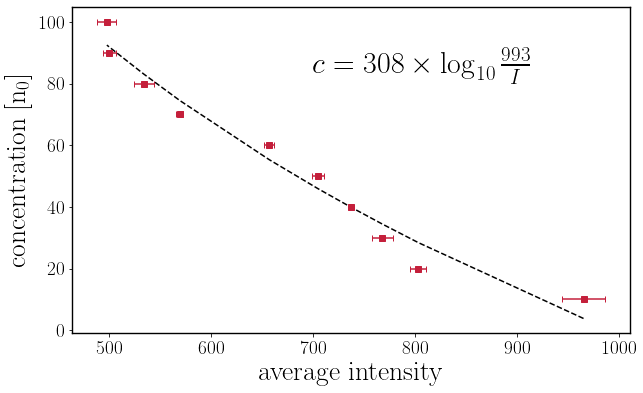

In [8]:
plt.errorbar(mean, c, xerr=std, ls='', c=wowcolor(0), marker='s',  capsize=3)
plt.plot(mean, log_fit(np.array(mean), *po), ls='--', color='black')
plt.ylabel('concentration [n$_0$]')
plt.xlabel('average intensity')
plt.text(700, 80, '$c=308\\times\log_{10}\\frac{993}{I}$', fontdict={'size': 30})

In [9]:
def linear_fit(x, a, b):
    return a - b * x
po, pv = curve_fit(linear_fit, mean, c, p0=[1000, 1])

Text(700, 80, '$c=186-0.19I$')

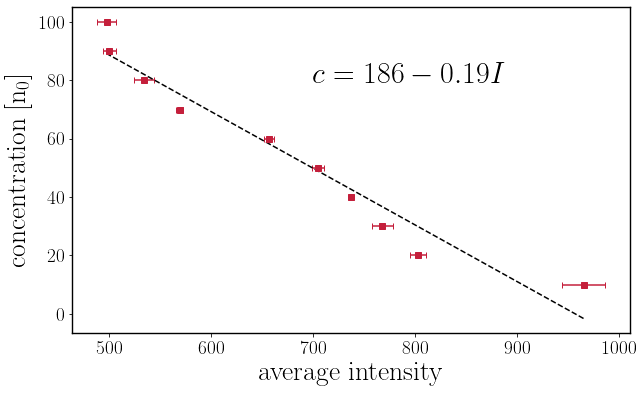

In [10]:
plt.errorbar(mean, c, xerr=std, ls='', c=wowcolor(0), marker='s',  capsize=3)
plt.plot(mean, linear_fit(np.array(mean), *po), ls='--', color='black')
plt.ylabel('concentration [n$_0$]')
plt.xlabel('average intensity')
plt.text(700, 80, '$c=186-0.19I$', fontdict={'size': 30})